In [1]:
import cv2
import sys, os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio
import Image
import cPickle as pickle
import shutil

### Functions

In [27]:
# Create the haar cascade
cascFile ="/Users/markus/Work/Insight-AI-Project/preprocess/FaceDetect/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascFile)


def detectFaces(image,faceCascade):
    # Read the image
    #image = cv2.imread(imageFile)   
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(50, 50),
        flags=cv2.CASCADE_SCALE_IMAGE
        # flags = cv2.cv.CV_HAAR_SCALE_IMAGE
        
    )
    #faces = faceCascade.detectMultiScale(gray, 1.3, 5)
    return faces

def crop_resize(image,cropRect,imaSize=64):
    x,y,w,h = cropRect
    cropped = image[y:y+h,x:x+w]
    return cv2.resize(cropped,(imaSize,imaSize), interpolation = cv2.INTER_CUBIC)

In [3]:
def convertAgeToLabel(age):
    ageBins  = [0, 18, 29, 39, 49 , 59, 131]
    ageLabels = [0,1,2,3,4,5]
    if isinstance(age,list) or np.size(age)>1 :
        return pd.cut(age, ageBins, labels=ageLabels)
    else:
        return pd.cut([age], ageBins, labels=ageLabels)[0]

In [4]:
convertAgeToLabel(2)
convertAgeToLabel([0,18,19,29,30,40,50,60,130])

[NaN, 0.0, 1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.0]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

### Check list of images for IMDB

In [5]:
imagePath = "/Users/markus/Work/data/wiki_crop/01/"
imageList=sorted(os.listdir(imagePath))
nima = len(imageList)
print("Found {} images".format(nima))

Found 651 images


In [17]:
# adjust for wiki data set
def calcAgeFromFileName(imageFile):
    try:
        f = imageFile.split("_")
        birthYear = f[1][:4]
        picYear = f[2][:-4]
  
        age=int(picYear)-int(birthYear)
    except ValueError:
        print("Age Calculation failed: "+imageFile)
        age=-1
    #print([imageFile,birthYear,picYear,age])
    return age

In [30]:
minSize =256
basePath = "/Users/markus/Work/data/wiki_crop/"
tarPath = '/Users/markus/Work/data/imdb-wiki_crop_clean/'

print(basePath)
print(tarPath)

noFace   =0
tooSmall =0
noAge =0
cnt =0
ageList=[]

ct = time.time()
for ifold in range(100): # 100 folders
    imagePath = basePath+str(ifold).zfill(2)+'/'
    if not os.path.exists(imagePath):
        print("Folder does not exist"+imagePath)
    else:
        imageList=sorted(os.listdir(imagePath))
        nima = len(imageList)
        cnt+=nima
        for k in xrange(nima):
            #image = np.array(Image.open(imagePath+imageList[15]))
            imageFile = imageList[k]
            image = cv2.imread(imagePath+imageFile)
            # check size
            if image.shape[0]<minSize or image.shape[1]<minSize:
                tooSmall+=1
                continue
            # check if only one face is present          
            if len(detectFaces(image,faceCascade))!=1:
                noFace+=1
                continue
            # check age
            age = calcAgeFromFileName(imageFile)
            ageList.append(age)                    
            if age<1 or age>130:
                noAge+=1
                continue
            
            # get age class and write file
            ageClass = convertAgeToLabel(age)
            # create new image file name with age class
            tarFile = imageFile[3:].replace('.jpg','_age{}.jpg'.format(ageClass))
            if not os.path.exists(tarPath):
                print("Folder does not exist: "+tarPath)
            else:
                shutil.copy2(imagePath+imageFile,tarPath+tarFile)

        if ifold%5==0:
            print([cnt,tooSmall,noFace,noAge])

print(cnt-tooSmall-noFace-noAge)
print("Elapsed time: {} min".format( (time.time()-ct)/60. ))

/Users/markus/Work/data/wiki_crop/
/Users/markus/Work/data/imdb-wiki_crop_clean/
[600, 347, 97, 0]
[3769, 2155, 647, 0]
[6859, 3848, 1199, 0]
[9926, 5606, 1757, 1]
[13026, 7309, 2364, 1]
[16135, 9063, 2954, 1]
[19261, 10787, 3532, 1]
[22443, 12596, 4073, 2]
[25501, 14314, 4629, 2]
[28623, 16104, 5194, 2]
[31778, 17870, 5802, 5]
[34866, 19671, 6367, 5]
[38057, 21445, 6966, 5]
[41134, 23155, 7553, 5]
[44296, 24944, 8114, 5]
[47324, 26616, 8675, 5]
[50459, 28358, 9276, 5]
[53689, 30160, 9882, 5]
[56800, 31876, 10464, 6]
[59899, 33559, 11073, 8]
15872
Elapsed time: 21.5665750821 min


In [23]:
3769-1045-985-1

1738

In [26]:
cnt-tooSmall-noFace-noAge

2884

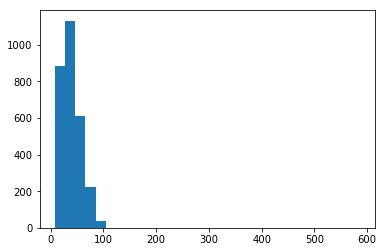

In [24]:
_=plt.hist(ageList,bins=30)

In [ ]:
[3769, 1045, 985, 1]
Elapsed time: 3.27632751862 min

In [145]:
srcPath=imagePath
tarPath = '/Users/markus/Work/data/imdb_crop_clean/'

print(src)
print(target)

ageClass = int('3')
tarFile = imageFile[3:].replace('.jpg','_age{}.jpg'.format(ageClass))

if not os.path.exists(tarPath):
    print("Folder does not exist: "+tarPath)
else:
    shutil.copy2(srcPath+imageFile,tarPath+tarFile)
    print(tarPath+tarFile)

/Users/markus/Work/data/imdb_crop/99/
/Users/markus/Work/data/imdb_crop_clean/
/Users/markus/Work/data/imdb_crop_clean/331599_rm3975273728_1996-11-27_2013_age3.jpg


### Testing

In [7]:
imagePath = "/Users/markus/Work/data/imdb_crop/00/"
imageList=sorted(os.listdir(imagePath))
nima = len(imageList)
print("Found {} images".format(nima))

ct = time.time()
numFaces=np.zeros(nima)

for k in xrange(10):#nima):
    image = cv2.imread(imagePath+imageList[k])
    faces = detectFaces(image,faceCascade)
    numFaces[k] = len(faces)

print("Time = {}".format(time.time()-ct))
print(sum(numFaces==1))

Found 3862 images
Time = 0.225005865097
3


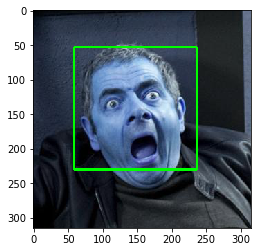

In [8]:
k=2
image = cv2.imread(imagePath+imageList[k])
faces = detectFaces(image,faceCascade)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

_=plt.imshow(image)    

(32, 32, 3)


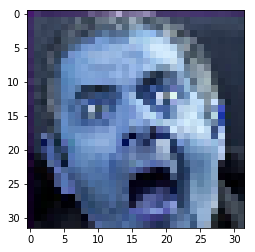

In [9]:
cropped = crop_resize(image,faces[0],32)
print(cropped.shape)
plt.imshow(cropped)
#plt.imshow(image)